In [1]:
import pandas as pn
import numpy as np
from sklearn.datasets import load_digits
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob
from PIL import Image

In [3]:
imgs = np.array([np.array(Image.open(path), dtype='float').ravel()
                 for path in glob.glob(r'C:\Users\048943\Desktop\NeuroNetworks\numbers\?.BMP')])
imgs[imgs == 0] = -1
imgs[imgs == 255] = 1

_imgs = np.array([np.array(Image.open(path), dtype='int')
                 for path in glob.glob(r'C:\Users\048943\Desktop\NeuroNetworks\numbers\?.BMP')])

## Пак с картинками потерян

IndexError: index 0 is out of bounds for axis 0 with size 0

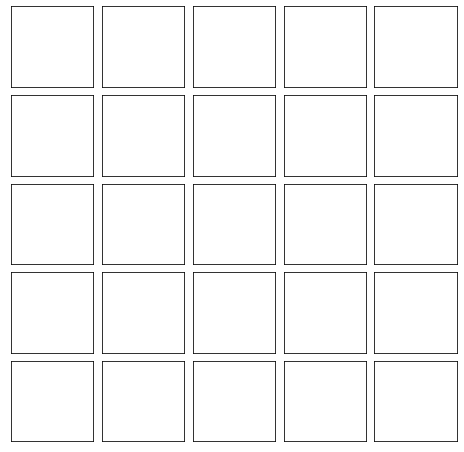

In [4]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw={'hspace': .1, 'wspace': .1})

for i in range(25):
    ax[i % 5, i // 5].imshow(_imgs[i], cmap='binary')

In [183]:
class HemmingNet:
    n = None
    m = None
    
    def __init__(self, epsilon=0.01, emax=0.1):
        self.epsilon = epsilon
        self.emax = emax

    def __funk_activaton(self, y):
        y[y > 2*self.m] = 2*self.m
        y[y < 0] = 0
        return y

    def __first_layer(self, matrix_w, vector_y):
        s1 = np.sum(matrix_w * vector_y, axis=1) + self.m / 2
        return self.__funk_activaton(s1)

    def __second_layer(self, f_lay):
        y1 = f_lay
        y2 = []
        
        if 0: # 1 - Вехний; 0 - Нижний
            while True:
                s2 = np.array([y1[i] - (self.epsilon * np.sum(y1[y1 != y1[i]])) for i in range(self.n)])
                y2 = self.__funk_activaton(s2)
                if np.linalg.norm(np.array([y2]) - np.array([y1])) <= self.emax:
                    return y2
                y1 = y2
        else:
            while True:
                s2 = np.array([y1[i] for i in range(self.n)])
                y2 = self.__funk_activaton(s2)
                print(s2)
                if np.linalg.norm(np.array([y2]) - np.array([y1])) <= self.emax:
                    return y2
                y1 = y2
    
    def fit(self, X, y):
        self.n = len(imgs)
        self.m = len(imgs[0])
        f_lay = self.__first_layer(X / 2, y)
        return self.__second_layer(f_lay)

In [184]:
y__ = np.array(Image.open(r'C:\Users\048943\Desktop\NeuroNetworks\6b.BMP'), dtype='float').ravel()
y__[y__ == 255] = 1
y__[y__ == 0] = -1

hrmming_net = HemmingNet()
vertor = hrmming_net.fit(imgs, y__)
res = np.argmax(vertor)
res

[159. 156. 133. 157. 161. 159. 165. 140. 163. 167.]


9

Text(0.5,1,'Predict')

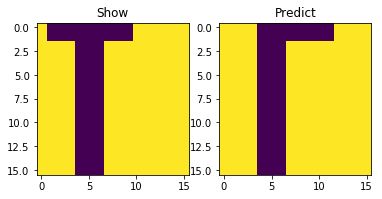

In [165]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(y__.reshape(16, 16))
ax[0].set_title('Show')

ax[1].imshow(imgs[res].reshape(16, 16))
ax[1].set_title('Predict')

In [166]:
plt.close('all')